# Classification problem for AIRLINE ACCIDENTS SEVERITY PREDICTION

Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

Collecting data and analysis

In [2]:
train=pd.read_csv("Train.csv")

In [3]:
test=pd.read_csv("test..csv")

In [4]:
train.head(5)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
test.head(5)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [6]:
print(train.shape,test.shape)

(10000, 12) (2500, 11)


In [7]:
#test and train data analysis and preprocessing


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [9]:
train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [10]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [11]:
train.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [12]:
test.isna().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [13]:
#Identify categorical and numerical columns in train data
train_cat=[col for col in train.columns if train.dtypes[col]=="object"]
train_num=[col for col in train.columns if train.dtypes[col]!="object"]
print("Categorical columns:",train_cat)
print("Numerical columns:",train_num)
#Identify categorical and numerical columns in test data
test_cat=[col for col in test.columns if test.dtypes[col]=="object"]
test_num=[col for col in test.columns if test.dtypes[col]!="object"]
print("Categorical columns:",test_cat)
print("Numerical columns:",test_num)

Categorical columns: ['Severity']
Numerical columns: ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID']
Categorical columns: []
Numerical columns: ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric', 'Accident_ID']


Exploratory Data Analysis

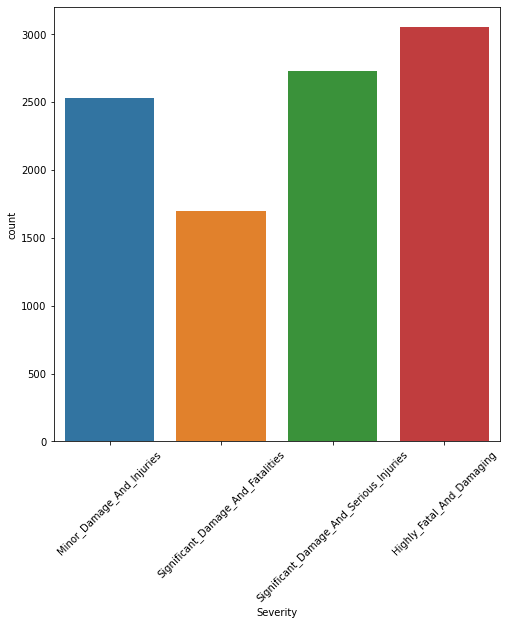

In [14]:
#['Severity']
plt.figure(figsize=(8,8))
sns.countplot(train["Severity"])
plt.xticks(rotation=45)
plt.show()

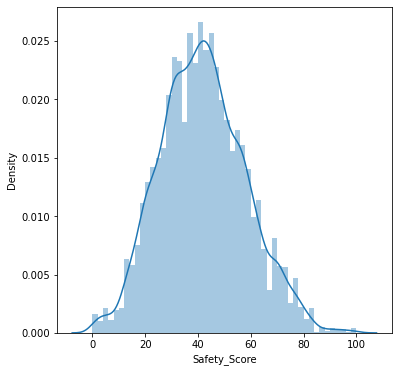

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(train["Safety_Score"])
plt.show()

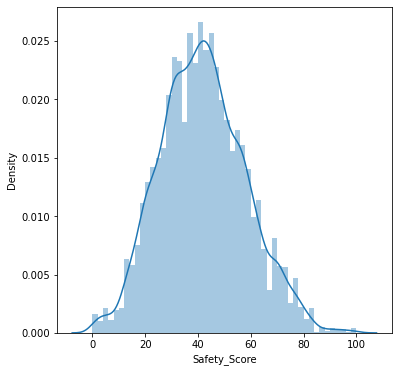

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(train["Safety_Score"])
plt.show()

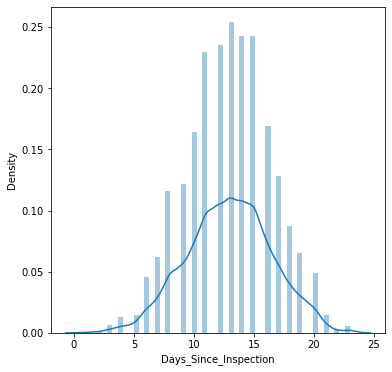

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(train["Days_Since_Inspection"])
plt.show()

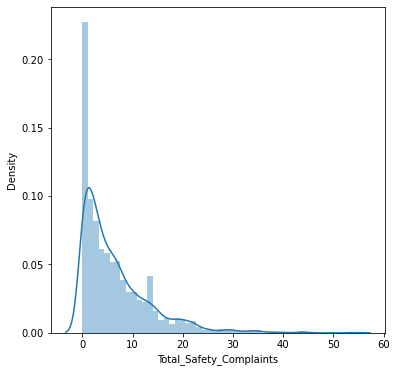

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(train["Total_Safety_Complaints"])
plt.show()

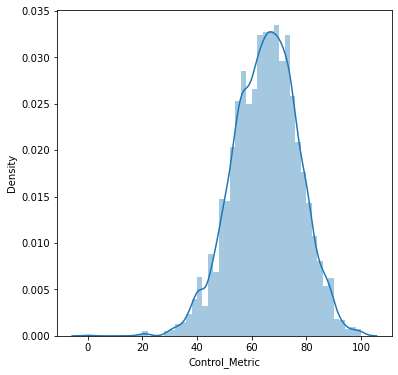

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(train["Control_Metric"])
plt.show()

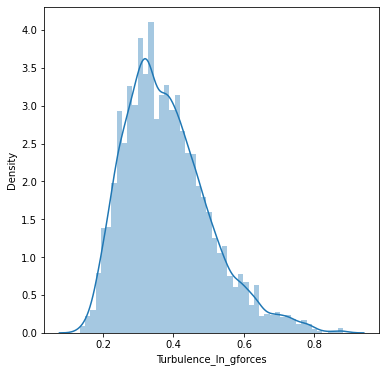

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(train["Turbulence_In_gforces"])
plt.show()

In [21]:
train_num

['Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Accident_Type_Code',
 'Max_Elevation',
 'Violations',
 'Adverse_Weather_Metric',
 'Accident_ID']

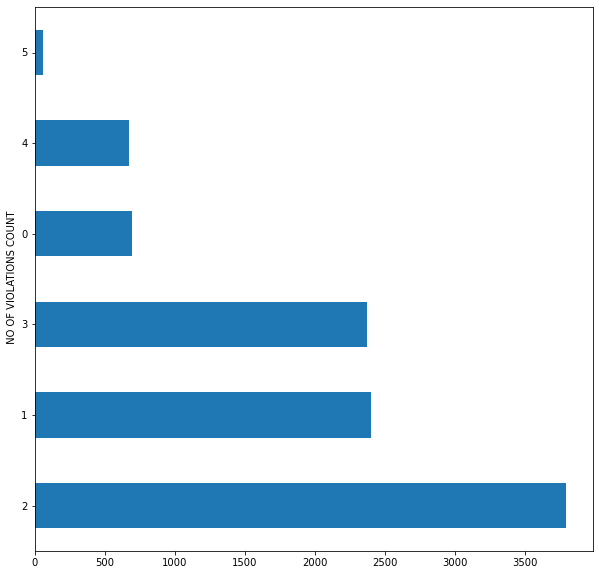

In [22]:

plt.figure(figsize=(10,10))
train["Violations"].value_counts().plot.barh()
plt.ylabel(" NO OF VIOLATIONS COUNT")
plt.show()

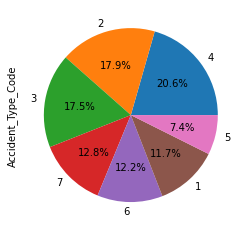

In [23]:
train["Accident_Type_Code"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [24]:
train["Severity"].head(5)

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [25]:
#Encoding
lr=LabelEncoder()
train["Severity"]=lr.fit_transform(train["Severity"])
train["Severity"].head(5)

0    1
1    1
2    2
3    3
4    2
Name: Severity, dtype: int32

In [26]:
#To find out the important features for classification, we are using Extra tree classifier

from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
#Split the dataset
X=train.drop(["Severity"],axis=1)
y=train["Severity"]

In [27]:
ex=ExtraTreesClassifier()
ex.fit(X,y)

ExtraTreesClassifier()

<AxesSubplot:>

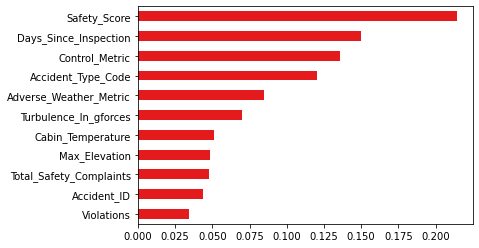

In [28]:
ex.feature_importances_
important_feature=pd.Series(ex.feature_importances_,index=X.columns)
important_feature.sort_values(ascending=True).plot(kind="barh", cmap="Set1")

In [29]:
print("top 5 important features are: \n",important_feature.sort_values(ascending=False))

top 5 important features are: 
 Safety_Score               0.214215
Days_Since_Inspection      0.150016
Control_Metric             0.135595
Accident_Type_Code         0.120355
Adverse_Weather_Metric     0.084435
Turbulence_In_gforces      0.069715
Cabin_Temperature          0.051009
Max_Elevation              0.048296
Total_Safety_Complaints    0.047862
Accident_ID                0.043883
Violations                 0.034621
dtype: float64


In [30]:
relevant_features=["Safety_Score","Days_Since_Inspection","Control_Metric","Accident_Type_Code","Adverse_Weather_Metric"]

# Model Building

In [31]:
models=[
    ("Decision Tree",DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ( "Gradient boosting",GradientBoostingClassifier()),
    ("Xgboost",XGBClassifier()),
    ("Knearest",KNeighborsClassifier())    
    
]
for model in models:
    clas=model[1]
    clas.fit(X,y)
    pred=clas.predict(X)
    print(model[0])
    print("Accuracy:",accuracy_score(y,pred))

Decision Tree
Accuracy: 1.0
Random Forest
Accuracy: 1.0
SVM
Accuracy: 0.3049
Gradient boosting
Accuracy: 0.9036
Xgboost
Accuracy: 1.0
Knearest
Accuracy: 0.5075


In [32]:
#Best model is Xgboost classifier. Hence train this model with train data
xg=XGBClassifier()
xg.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

# Hyperparameter tuning

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters for the grid search
parameters = {'max_depth':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf':[1,2,3,4,5]}

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Create the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create the decision tree classifier with the best set of hyperparameters
clf = DecisionTreeClassifier(max_depth=10,min_samples_split=6,min_samples_leaf=1)

# Perform cross-validation on the decision tree classifier using 5 folds
scores = cross_val_score(clf, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the random forest classifier
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Create the random forest classifier with the best set of hyperparameters
rf = RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators= 100)

# Perform cross-validation on the decision tree classifier using 5 folds
scores = cross_val_score(rf, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [ ]:
#Knearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Initialize the K-NN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to perform hyperparameter tuning and cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best parameters from the tuning
best_params = grid_search.best_params_
print(best_params)

# Use the best parameters to train the model on the full training set
knn = KNeighborsClassifier(**best_params)
knn.fit(X, y)

# Evaluate the model on the test set
y_pred = knn.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy)

# Perform cross validation with 5 folds
scores = cross_val_score(knn, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())


In [ ]:
# #SVM
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Define the parameters to tune
# param_grid = {'C': [0.1, 1, 10],
#               'kernel': ['linear', 'rbf', 'poly'],
#               'degree': [2, 3, 4],
#               'gamma': ['scale', 'auto']}

# # Initialize the SVM classifier
# svm_clf = svm.SVC()

# # Use GridSearchCV to perform hyperparameter tuning and cross validation
# grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
# grid_search.fit(X, y)

# # Get the best parameters from the tuning
# best_params = grid_search.best_params_
# print(best_params)

# # Use the best parameters to train the model on the full training set
# svm_clf = svm.SVC(**best_params)
# svm_clf.fit(X, y)

# # Evaluate the model on the test set
# y_pred = svm_clf.predict(X)
# accuracy = accuracy_score(y, y_pred)
# print("Accuracy: ", accuracy)


In [ ]:
#Gardient boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameters to tune
param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5]}

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Use GridSearchCV to perform hyperparameter tuning and cross validation
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best parameters from the tuning
best_params = grid_search.best_params_
print(best_params)

# Use the best parameters to train the model on the full training set
gb = GradientBoostingClassifier(**best_params)
gb.fit(X, y)

# Evaluate the model on the test set
y_pred = gb.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy)


In [ ]:
#XGboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameters to tune
param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5]}

# Convert data to xgboost format
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X, label=y)

# Use GridSearchCV to perform hyperparameter tuning and cross validation
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

# Get the best parameters from the tuning
best_params = grid_search.best_params_
print(best_params)

# Use the best parameters to train the model on the full training set
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X, y)

# Evaluate the model on the test set
y_pred = xgb_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: ", accuracy)



# Model testing with test data

In [ ]:
y_pred=xg.predict(test)
test.columns

In [ ]:
sub=test["Accident_ID"]
y_out=pd.DataFrame(y_pred,columns=["Severity"])
sub=pd.DataFrame(sub)

In [ ]:
submission=pd.concat([sub,y_out],axis=1)
severity_map = {0: 'Highly_Fatal_And_Damaging', 1: 'Minor_Damage_And_Injuries', 
                2: 'Significant_Damage_And_Fatalities', 3: 'Significant_Damage_And_Serious_Injuries'}
submission["Severity"] = submission["Severity"].map(severity_map)


In [ ]:
submission.set_index("Accident_ID")

In [ ]:
submission.to_csv("Airline_submission.csv")